# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

import os

dir_curr = os.getcwd()

training_file = os.path.join(dir_curr, 'data/train.p')
testing_file = os.path.join(dir_curr, 'data/test.p')


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_raw, y_train_raw = train['features'], train['labels']
X_test_raw, y_test_raw = test['features'], test['labels']

#todo: shuffle the x,y coherently

In [2]:
### To start off let's do a basic data summary.

# number of training examples
n_train = X_train_raw.shape[0]

# numb.er of testing examples
n_test = X_test_raw.shape[0]

# the shape of an image
image_shape = X_train_raw.shape[1:]

# how many classes are in the dataset
n_classes = len(set(y_train_raw))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


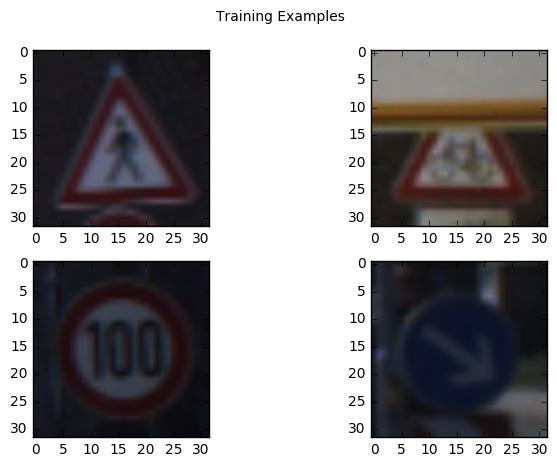

In [164]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
import numpy as np

# plot training examples

def findRandomTrainingImage():
    idx = int(n_train * np.random.random())
    image_np = np.array(X_train_raw[idx])
    return image_np
    

plt.rcParams['figure.figsize'] = (8, 5) # width, height

plt.figure(1)
plt.suptitle('Training Examples')

plt.subplot(221)
img = findRandomTrainingImage()
plt.imshow(img)

plt.subplot(222)
img = findRandomTrainingImage()
plt.imshow(img)

plt.subplot(223)
img = findRandomTrainingImage()
plt.imshow(img)

plt.subplot(224)
img = findRandomTrainingImage()
plt.imshow(img)

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Normalize Image data for Zero Mean and Equal Variance
X_train_norm = (X_train_raw - 128.0)/128.0
X_test_norm = (X_test_raw - 128.0)/128.0


    

y_train_one_hot = np.eye(n_classes)[y_train_raw]
y_test_one_hot = np.eye(n_classes)[y_test_raw]





### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

By substracting and dividing by 128, the image data are normlized to have zero mean and equal variance. 
The raw output y contains the index of the image class lable. One_hot_encoding is applied to all raw output data at the begining. Future optimization work include to do the one_hot_encoding during batching process to lower the RAM consumption.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

Part of the training data is seperated into validation data for cross-validation purpose. Additional data is generated by tilting the image by small degree. Future optimization work would be to have more types of image trasformation, e.g. changing perspectives, illumination, to generate more data.

With larger dataset, the model would have more opportunities to get trained on variety of scenarios and furhter improve prediciton accuracy. 

In [134]:
### todo: Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.



#todo: image transformation, e.g. rotation, illumination
from scipy import ndimage 


def TrafSign_DataAugmentation_Rotation(existing_data, num_of_new): 

    # X_train_rot = np.array([], dtype=np.int).reshape((0,)+X_train_raw[0].shape) 
    degree =  (360/(num_of_new+1))  # increment by (360/rotation_image_num)
    
    data_rot = ndimage.rotate(existing_data,degree,(2,1),reshape=False)

    for i in range(num_of_new-1):
        data_rot_tmp = ndimage.rotate(existing_data,degree*(i+2),(2,1),reshape=False) # i+2 is for the 2nd new image array
        data_rot = np.vstack((data_rot,data_rot_tmp))
    return data_rot


# tilt images by a small degreee
def TrafSign_DataAugmentation_SmallTilt(existing_data): 

    degree = 15  # increment by (360/rotation_image_num)
    
    data_rot_positive = ndimage.rotate(existing_data,degree,(2,1),reshape=False)
    
    degree = 360 - degree
    
    data_rot_negative  = ndimage.rotate(existing_data,degree,(2,1),reshape=False)

    data_rot = np.vstack((data_rot_positive,data_rot_negative))
    
    return data_rot

In [135]:
#  Rotation_NumOfNewImage = 2
# X_train_rot = TrafSign_DataAugmentation_Rotation(X_train_raw, Rotation_NumOfNewImage)

X_train_rot = TrafSign_DataAugmentation_SmallTilt(X_train_raw)

y_train_rot_one_hot = np.tile(y_train_one_hot, (Rotation_NumOfNewImage, 1))

35543


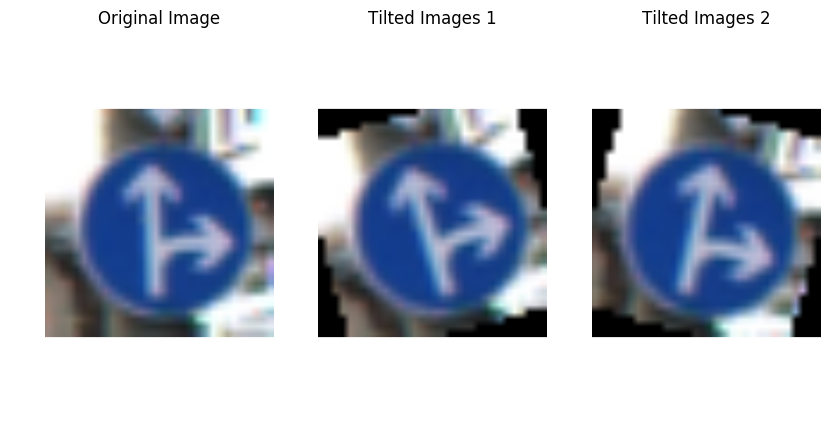

In [166]:
# plot augmented examples

idx = int(n_train * np.random.random())

print(idx)
Rotation_NumOfNewImage =2

plt.rcParams['figure.figsize'] = (10, 5) # width, height

fig, axes = plt.subplots(nrows=1, ncols=Rotation_NumOfNewImage+1, sharex=True)

img = X_train_raw[idx]
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[0].imshow(img)

for i in range(Rotation_NumOfNewImage):
    img = X_train_rot[idx + i*n_train]
    axes[i+1].set_title('Tilted Images {}'.format(i+1))
    axes[i+1].axis('off')
    axes[i+1].imshow(img)

plt.show()

In [7]:
X_train = np.vstack((X_train_norm, X_train_rot))
y_train = np.vstack((y_train_one_hot,y_train_rot_one_hot))

X_test = X_test_norm
y_test = y_test_one_hot

In [8]:
# cross validation

from sklearn.model_selection import train_test_split


#shuffle the example set, so the gradients do not get tuned into the patterns in the dataset. 
InputSet_Train, InputSet_Validation, OutputLabel_Train, OutputLabel_Validation = \
     train_test_split(X_train, y_train, test_size=0.2, random_state=10, stratify=y_train)



InputSet_Test = X_test
OutputLabel_Test = y_test_one_hot




size_train = InputSet_Train.shape[0]
size_validation = OutputLabel_Validation.shape[0]
size_test = OutputLabel_Test.shape[0]


print('Input Set Size: \n Training = ', InputSet_Train.shape, 
      '\n Validation = ', InputSet_Validation.shape, 
      '\n Test = ', InputSet_Test.shape
     )

print('Output Set Size: \n Training = ', OutputLabel_Train.shape, 
      '\n Validation = ', OutputLabel_Validation.shape, 
      '\n Test = ', OutputLabel_Test.shape
     )


Input Set Size: 
 Training =  (94101, 32, 32, 3) 
 Validation =  (23526, 32, 32, 3) 
 Test =  (12630, 32, 32, 3)
Output Set Size: 
 Training =  (94101, 43) 
 Validation =  (23526, 43) 
 Test =  (12630, 43)


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The architecture consists of two layers of Convolutional Neural Network(CNN) and two layers of Fully Connected neurual network(FC). 

![](doc/model_architecture.png?raw=true)


In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

#Hyper-parameters
learning_rate = 0.001
TraffSign_Epochs = 5
batch_size = 64
display_step  = 1  
Dropout_KeepProb = 0.8

# Output depth
ConvNet_1_OutputDepth = 16
ConvNet_2_OutputDepth = 32

# Image Properties
image_width = image_shape[0]
image_height = image_shape[1]
color_channels = image_shape[2]


# Convolution filter - the image size of 32x32 is small 
filter_size_width = 5
filter_size_height = 5
filter_stride = [1, 2, 2, 1] 

  

#hidden layer
n_hidden_layer = 128 # layer number of features


In [10]:
def TF_createWeight(shape):
    return tf.Variable(tf.truncated_normal(shape,stddev=0.001))

def TF_createBias(output_size):
    return tf.Variable(tf.constant(0.001,shape=[output_size]))


def TF_getFeatureNum(input_tensor):
    
    t_shape = input_tensor.get_shape()    
    if(t_shape.ndims>1):
        feature_num = t_shape[1:].num_elements()
    elif (t_shape.ndims == 0):
        raise Exception('0-D tensor is not useful to train model!') 
    
    return feature_num
        
        
def TF_flattenTensor(input_tensor):
    
    feature_num = TF_getFeatureNum(input_tensor)
    
    if(feature_num>1):
        input_tensor = tf.reshape(input_tensor,[-1,feature_num])
    elif (t_shape.ndims == 0):
        raise Exception('0-D tensor is not useful to train model!') 
        
    return input_tensor

In [11]:
def TF_createConvNetLayer(
                            input_x,
                            filter_shape, 
                            stride, 
                            padding, 
                            relu_enabled = False, 
                            maxpool_enable = False,
    ):
    
    weight = TF_createWeight(filter_shape)
    bias = TF_createBias(filter_shape[3])

    
    
    # Apply Convolution 
    conv_layer_weight = tf.nn.conv2d(input_x, weight, stride, padding) 
    # the input tensor has 4 dimensions: [batch, height, width, channels] 

    # Add bias 
    conv_layer = tf.add(conv_layer_weight, bias) 
    
    if maxpool_enable == True:
        conv_layer = tf.nn.max_pool(    value=conv_layer,
                                   ksize=[1, 2, 2, 1],
                                   strides=[1, 1, 1, 1],
                                   padding='SAME'
                              )
            
    if (relu_enabled == True):
        # Apply activation function 
        conv_layer = tf.nn.relu(conv_layer)
        
    return conv_layer


def TF_creatFulConLayer2D(input_x, output_size, relu_enable = False):
    
    input_x = TF_flattenTensor(input_x)
    
    feature_num = TF_getFeatureNum(input_x)
    
    
    weight = TF_createWeight([feature_num, output_size ])
    bias = TF_createBias(output_size)


    fc_layer = tf.add(tf.matmul(input_x, weight), bias)

    if(relu_enable == True):       
        fc_layer = tf.nn.relu(fc_layer)    

    return fc_layer

In [12]:
# Input/Image - [batch_size, height, width, channels] 

nn_input = tf.placeholder( 
                    tf.float32, 
                    shape=[None, image_width, image_height, color_channels]
                   )


nn_output = tf.placeholder(tf.float32, [None, n_classes]) 
#nn_output = tf.placeholder(tf.int64, [ None]) 
# one_hot() takes first parameter as indeces, which has value begin from 0. However, the class value can be any number, real or nutural number.
# n_output_one_hot = tf.one_hot(nn_output, n_classes)

In [13]:
#Model Architecture:

layer_convn1 = TF_createConvNetLayer(
                                nn_input,
                                filter_shape = [filter_size_width, filter_size_height, color_channels, ConvNet_1_OutputDepth],
                                stride = filter_stride,
                                padding = 'SAME',
                                relu_enabled = True,
                                maxpool_enable = False,
                              )
layer_convn2 = TF_createConvNetLayer(
                                layer_convn1,
                                filter_shape = [filter_size_width, filter_size_height, ConvNet_1_OutputDepth, ConvNet_2_OutputDepth],
                                stride = filter_stride,
                                padding = 'SAME',
                                relu_enabled = True,
                                maxpool_enable = True,
                              )

layer_fc1 = TF_creatFulConLayer2D(layer_convn2, output_size = n_hidden_layer, relu_enable = True)

layer_fc1 = tf.nn.dropout(layer_fc1, Dropout_KeepProb)

logits = TF_creatFulConLayer2D(layer_fc1, output_size = n_classes, relu_enable = False)


In [14]:

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, nn_output))

# cost = tf.reduce_mean(-tf.reduce_sum(nn_output * tf.log(tf.clip_by_value(tf.nn.softmax(logits),1e-10,1.0)), reduction_indices=[1]))
# GradientDescentOptimizer() is slower in driving down lost. Based on my test of 20 epochs, Adam acheives >90% after 10 epochs, while regular gradient descent optimizer attains only 6% accuracy.  
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(nn_output, 1))
# Calculate validation accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [15]:
import logging
logging.basicConfig(filename='log_test_result.txt', level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')
logging.info('========================================\n                                     Training Begins - AdamOptimizer  \n=========================================================================')
logging.info('Learning Rate: {}'.format(learning_rate))
logging.info('Batch Size: {}'.format(batch_size))
logging.info('Kernal Size: {} x {}'.format(filter_size_width, filter_size_height))
logging.info('Stride Parameters Size: {}'.format(filter_stride))
logging.info('Dropout keep_prob: {}'.format(Dropout_KeepProb))


logging.info('layer_convn1: {}'.format(layer_convn1))
logging.info('layer_convn2: {}'.format(layer_convn2))
logging.info('layer_fc1: {}'.format(layer_fc1))
logging.info('logits: {}'.format(logits))

In [199]:



    
def findNextDatasetBatch(batch_idx, batch_total, batch_length, ls_input_matrix, ls_output_matrix):
    
    if (batch_idx == (batch_total-1)):
        #last batch does not necessarily have enough examples
        return ls_input_matrix[batch_idx*batch_length:], ls_output_matrix[batch_idx*batch_length:]
    else:
        return ls_input_matrix[batch_idx*batch_length:(batch_idx+1)*batch_size], ls_output_matrix[batch_idx*batch_length:(batch_idx+1)*batch_length]
    
    

def calcDatasetAccuracy(session, ls_input_matrix, ls_output_matrix):

    length = batch_size #use global batch size
    total_num = int(np.ceil(ls_input_matrix.shape[0]/batch_size))
    
    accu_sum_batch = 0
    
    # Loop over all batches
    for i in range(total_num):
        batch_x, batch_y = findNextDatasetBatch(i, total_num, length, ls_input_matrix,  ls_output_matrix)
        
        accu_sum_batch += session.run(accuracy, feed_dict={nn_input: batch_x, nn_output: batch_y})
        
    accu_full = accu_sum_batch/total_num
    
    return accu_full
    
 
def calcFinalAccuracy(session,print_enable = False):
    
    
    accu_full_train = calcDatasetAccuracy(session, InputSet_Train, OutputLabel_Train )

    logging.info("***Accuracy - Full Training:         {:.2f}%".format( accu_full_train*100) )

    
    
    accu_full_validation = calcDatasetAccuracy(session, InputSet_Validation, OutputLabel_Validation )
    
    logging.info("***Accuracy - Full Validation:       {:.2f}%".format( accu_full_validation*100) )
    
    
    
    accu_full_test = calcDatasetAccuracy(session, InputSet_Test, OutputLabel_Test )
    
    logging.info("***Accuracy - Full Test:             {:.2f}%".format( accu_full_test*100) )
    
    if(print_enable == True):
        print("Accuracy - Full Training:", accu_full_train)
        print("Accuracy - Full Validation:", accu_full_validation)    
        print("Accuracy - Full Test:", accu_full_test)    

    


In [200]:
def TraffSign_trainModel(sess, epochs):
    # Training cycle
    for epoch in range(epochs):
        total_batch = int(size_train/batch_size) 
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = findNextDatasetBatch(i, total_batch, batch_size, InputSet_Train, OutputLabel_Train )

            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={nn_input: batch_x, nn_output: batch_y})
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            
            batch_x, batch_y = findNextDatasetBatch(0, total_batch, batch_size, InputSet_Train, OutputLabel_Train ) # use first batch to test
            
            c = sess.run( cost, feed_dict={nn_input: batch_x, nn_output: batch_y})

            logging.debug("Epoch: {:5d};  cost={:.9f}".format((epoch+1), c))
 
            accu_vali = accuracy.eval(session=sess, feed_dict={nn_input: batch_x, nn_output: batch_y})
    
            logging.debug("Accuracy(training batch): {:.2f}%".format(accu_vali*100)) 
        if epoch % (display_step*10) == 0:
            calcFinalAccuracy(sess)
    
    print("Optimization Finished!")
    logging.info("Optimization Finished!")
    # Test model
    
    calcFinalAccuracy(sess, print_enable = True)

    


In [192]:
### Train your model here.
### Feel free to use as many code cells as needed.


# Launch the graph"
TraffSign_Session = tf.Session()

TraffSign_Session.run(init)

In [211]:
import time
from datetime import timedelta

time_start = time.time()


TraffSign_trainModel(TraffSign_Session, epochs = 10)


time_end = time.time()
print("Time usage: " + str(timedelta(seconds=int( time_end - time_start))))
logging.info("Time usage: {}".format(timedelta(seconds=int( time_end - time_start))) )

Optimization Finished!
Accuracy - Full Training: 0.868188246588
Accuracy - Full Validation: 0.840715281827
Accuracy - Full Test: 0.739102674554
Time usage: 0:11:05


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


- Optimizer

   Adam Optimizer is used. During the tests, the regular Gradient Descent Optimizer gets 6% accuracy after 20 epochs. In comparison, Adam Optimizer can attain >90% accuracy in 5 epochs.    

  
- Batch Size

   A large batch size consumes memory. In contrast, a relatively samller batch size allows more interations of backprop to drive down cost. It is observed that size of 128 causes NaN logits on my computer with 12G RAM. A size of 64 is chosen for this application.


- Epochs

    Due to the limiation of PC, the test is mostly performed under 20 epochs. A longer test can help either Gradient Descent Optimizer or Adam Optimizer to steadly drive down cost. In addition, using better hardware or cloud services would help. But for this study, the focus is on more properly tuned hyper-parameters.


- Learning Rate

    Learning is key in the training effectiveness. 0.001 is the default rate for Adam Optimizer. It is observed that a highter 0.01 or a lower 0.0005 does not provide a better performance that the default value during test. Therefore, 0.001 is used for learning rate. 


- Kernal Size

    The sizes of 3x3, 5x5, and 7*7 are tested to compare performance. It turns out 5x5 is the best in the testing.


- CNN Stride 

    Stride of 2 is used as it provides good performance.
 
   
- CNN depths

    The first layer of CNN has the depth of 16 which extracts good volume of the local-specific features and provide a small memory footprint for the low power PC. The second layer increases the depth to 32 to maintain the feature volume. 
    


- Dropout Probablity 

    0.8 is used to provide reduancy and robustness of the model solution against new images. 
    


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**


The design is inspired by biological interpretations. The CNN are like retina in the human eyes. The eyes focus on a small patch of area, then move that focus patch to scan to whole image. In particular, when we try to learn a new and complex material, for example a new article, we read word by word instead of trying to picture the whole page all at once. Also, human being sometime falls in the the pigeonhole hole fallacy because our focus area is sometimes too small. The pigeonhole effect also shows having a focus area is a kind of mechanism in human mind.  Furthermore, the brain continues processing the image from eyes. This shows that our eyes do have an adjustable focus area just like the CNN kernal. In addition, we often try to see the big picture before noticing small details. Or we always a first impression of general traits before knowing specifics. So a large FC layer imitates that big picture mindset. Then we narrow down the decision to the number of classes for identification.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [183]:
if 0:
    
    saver = tf.train.Saver()
    saver.save(TraffSign_Session, 'TraffSign_Session_model_save')

if 0:
    new_saver = tf.train.import_meta_graph('TraffSign_Session_model_save.ckpt.meta')
    new_saver.restore(TraffSign_Session, 'TraffSign_Session_model_save.ckpt')

In [203]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import scipy  
import matplotlib.image
import matplotlib.pyplot as plt
import glob

def TrafSign_Img_cropSquare(img):
    len_row = img.shape[0]
    len_col = img.shape[1]
    
    offset = np.minimum(len_row,len_col)//2
    
    new_row_start   = len_row//2 - offset
    new_row_end     = len_row//2 + offset
    
    new_col_start   = len_col//2 - offset
    new_col_end     = len_col//2 + offset
    
    return img[new_row_start:new_row_end, new_col_start:new_col_end, : ]



def TrafSign_initImage(file_loc):
    image_list = []
    for filename in glob.glob(file_loc): #assuming gif
        im = matplotlib.image.imread(filename) 
        im_cropped = TrafSign_Img_cropSquare(im)
            
        im_resize = scipy.misc.imresize(im_cropped,(32,32), 'cubic')
        image_list.append(im_resize)
       
    image_array = np.array(image_list)   
        
    return image_array
    
#%% Image Display
def TrafSign_displayHoriImages(img_dataset):
    n_img = img_dataset.shape[0]

    fig, axs = plt.subplots(1,n_img)
    
    for i in range(n_img):
        axs[i].imshow(img_dataset[i,:,:,:]) 
        axs[i].axis('off')

    fig_size = [12,12]
    plt.rcParams["figure.figsize"] = fig_size
    
    plt.show()  
    
    

In [204]:
def TraffSign_loadAllPredictedClassList(np_classes_idx, dict_sign):
    ls_class = []
    
    num = np_classes_idx.size
    
    for i in range(num):
        cls_idx = str(np_classes_idx[i])
        ls_class.append(dict_sign[cls_idx])
        
    return ls_class

def TraffSign_loadAllPredictedProbList(np_prob):
    num = np_prob.size
    
    ls_probilities= np_prob.reshape(num,1)
    
    return ls_probilities

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

The sign about snow danger is covered by snow. It means some charateristics of the sign is unseen by the model, so it would make it hard to identify. 

In [205]:
def TraffSign_predictImages(session, top_k, ls_input_matrix):
    
    logits_softmax = tf.nn.softmax(logits)
    logits_softmax_topk = tf.nn.top_k(logits_softmax, k = top_k)                              
    prediction = session.run(logits_softmax_topk, feed_dict={nn_input: ls_input_matrix})
            
    return prediction

  
    
def TraffSign_loadSignDict(file):

    import csv
    d = {}
    with open(file) as f:
        reader = csv.DictReader(f, delimiter=',')
        for row in reader:

            k=row['ClassId']
            v= row['SignName']
            d[k] = v
    return d

#img: an image
def TraffSign_visualizeSingleImgProbTable( np_img, ls_class, ls_probilities):
    
    plt.rcParams['figure.figsize'] = (15, 2) # width, height

    fig, axs =plt.subplots(1,2)
    clust_data = ls_probilities
    rowlable = ls_class
    tbl_pos_box=[.3, 0.3, .6, 0.5] #[left, bottom, width, height]
        
    axs[1].axis('tight')
    axs[1].axis('off')
    axs[1].table(   cellText=   clust_data,
                    rowLabels=rowlable,
                    loc='left',
                    bbox = tbl_pos_box,
                )

    axs[1].set_title('Prediction: {}'.format(ls_class[0]))
    
    axs[0].imshow(np_img)
    axs[0].axis('off')


    plt.show()  


    
      
    

def TrafSign_VisualizeTopPrediction(dataset_img, matrix_class_idx, matrix_prob, dict_sign):
    
    num = matrix_class_idx.shape[0]
    
    for i in range(num):

        ls_classes = TraffSign_loadAllPredictedClassList(matrix_class_idx[i,:], dict_sign)

        ls_probilities = TraffSign_loadAllPredictedProbList(matrix_prob[i,:])

        TraffSign_visualizeSingleImgProbTable(dataset_img[i,:,:,:], 
                                   ls_classes ,
                                   ls_probilities,
                                )

In [206]:
#img: an image
def TraffSign_visualizeSingleImgPrediction( np_img, ls_class, ls_probilities):
    
    plt.rcParams['figure.figsize'] = (15, 2) # width, height

    fig, axs =plt.subplots(1,2)


    axs[0].imshow(np_img)
    axs[0].axis('off')
    
    N = ls_probilities.size 
    bar_y = ls_probilities 
    bar_x = ls_class
    ind = np.arange(N)    # the x locations for the groups
    width = 0.5      # the width of the bars: can also be len(x) sequence
    
    axs[1].bar(ind, bar_y, width, color='g')
    
    
    axs[1].set_ylabel('Probability')
    axs[1].set_title('Prediction Certainty')
    axs[1].set_xticks(ind + width/2.)



    axs[1].set_xticklabels(bar_x)
    axs[1].set_yticks(np.arange(0, 1,0.2))
    
    fig.autofmt_xdate()   
    
    plt.show()  

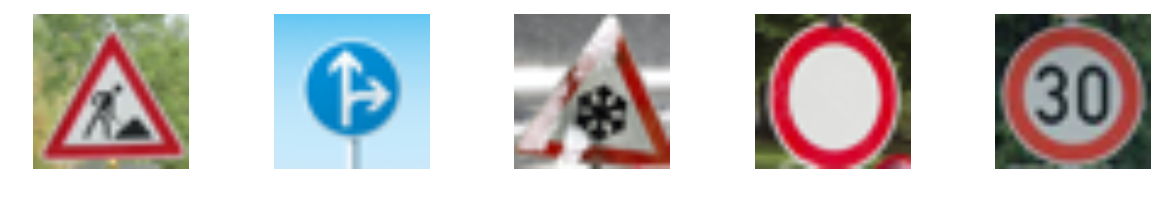

In [207]:
 
TrafSign_NewImgDataset = TrafSign_initImage('data/new_img/*.jpg')


TrafSign_displayHoriImages(TrafSign_NewImgDataset)

In [208]:
### Run the predictions here.
NewImg_Prediction_Prob, NewImg_Prediction_Class = TraffSign_predictImages(session         = TraffSign_Session, 
                                                                          top_k           = 5, 
                                                                          ls_input_matrix = TrafSign_NewImgDataset,
                                                     )

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

The model does not perform as well with the captured pictures from internet. Reasons could be as following.

- Lack of training, so new images are not recognizable yet by the model 
- Low resolution in some captured picture. In normal an autonomous driving car, a better camera should provide sufficient resolution.
- Lack of better preprocessing. Further work can be done to extract the region of interest and feature before training or prediction.
    

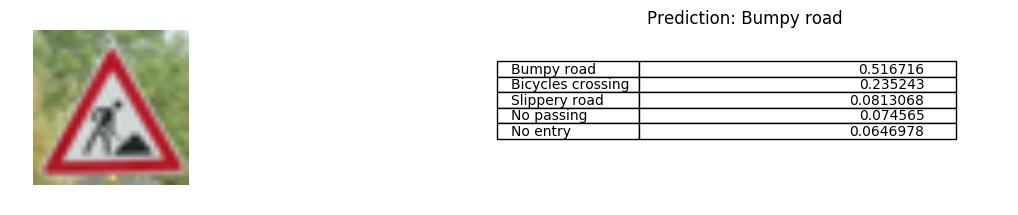

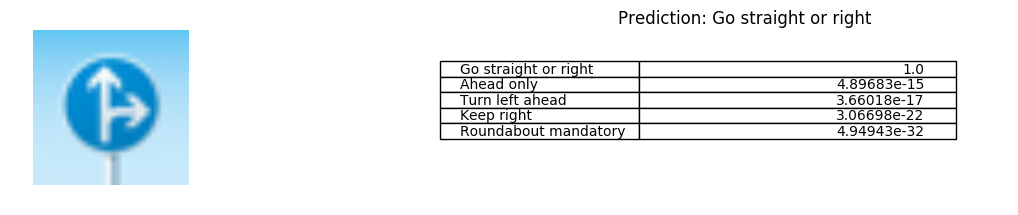

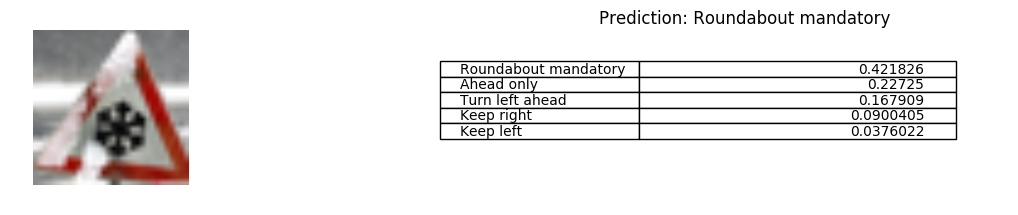

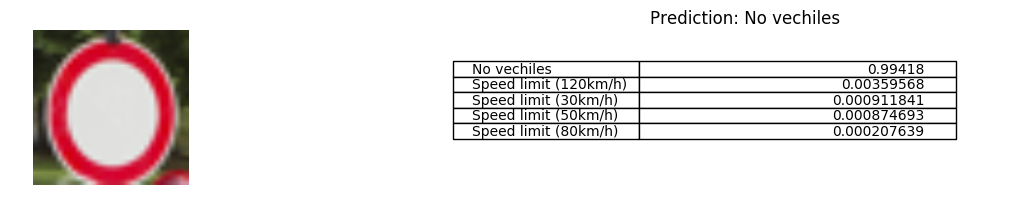

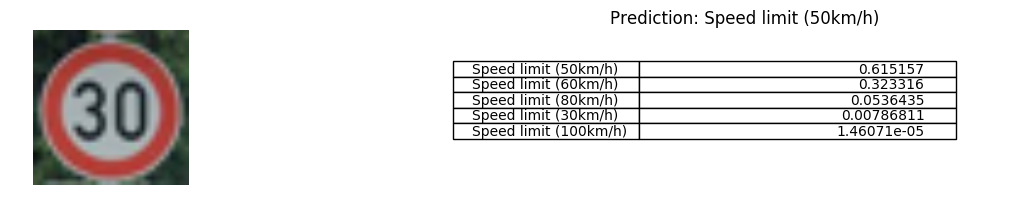

In [212]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

SignDict = TraffSign_loadSignDict('signnames.csv')

TrafSign_VisualizeTopPrediction(TrafSign_NewImgDataset, 
                                NewImg_Prediction_Class ,
                                NewImg_Prediction_Prob,
                                SignDict,
                               )



### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

It turns out the model is very certain about the predictions that it is correct about. For example, the second image of "Go straight or right" has probability of about 1 or 100%. For the wrong prediction, the model shows uncertainty in its classification. For example, on the third snow danger, The model indicate the top possiblity is lower than 50% and the next two classes have relatives high probablities around 10% to 20%. In this case, the model cannot tell what the sign is, and the model indicates that all classes seem relatively and equally unlikely to be any sign. Therefore, to adopt any model prediction, we need the projected probablity to be high, e.g. >90%, before we can trust its prediction.

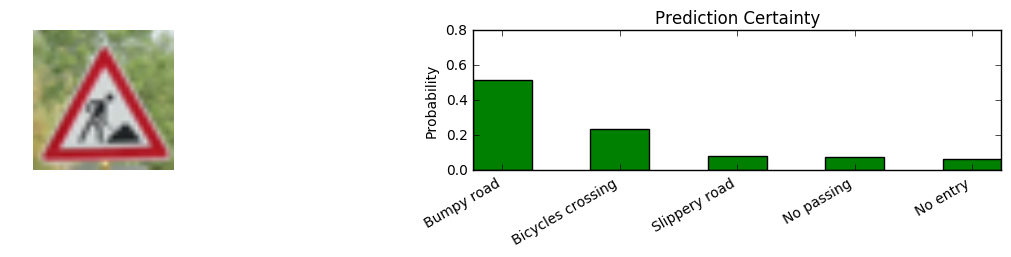

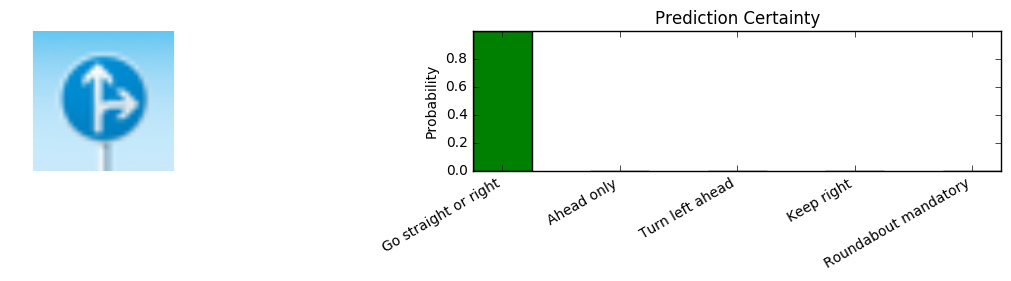

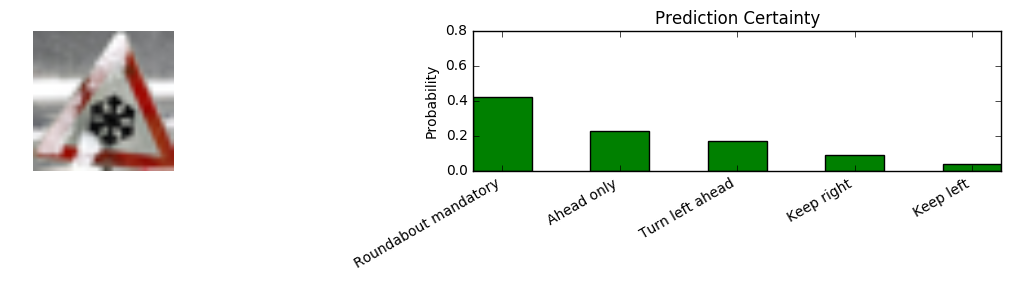

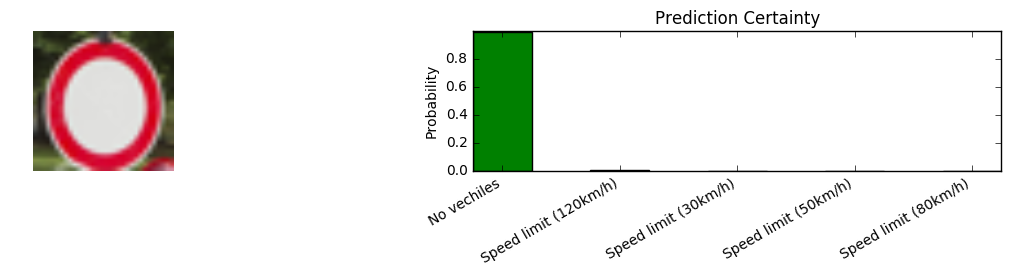

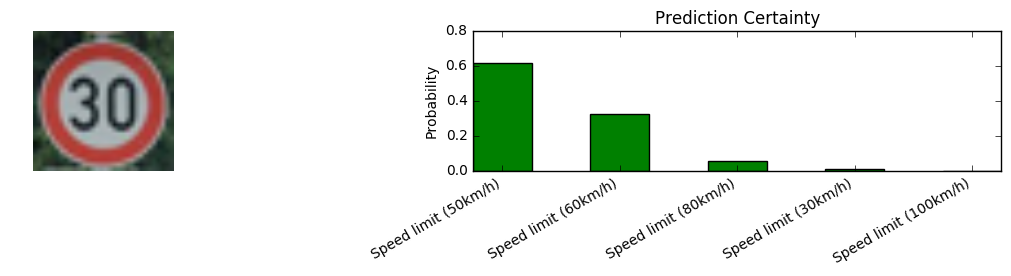

In [213]:
#%% visulize prediction

# ls_classes = ['sign1','sign2','sign3','sign4','sign4']
def TraffSign_visualizeAllPrediction(dataset_img, matrix_class_idx, matrix_prob, dict_sign):
    
    num = matrix_class_idx.shape[0]
    
    for i in range(num):

        ls_classes = TraffSign_loadAllPredictedClassList(matrix_class_idx[i,:], dict_sign)

        ls_probilities = TraffSign_loadAllPredictedProbList(matrix_prob[i,:])
        #ls_probilities = np.char.mod('%.2f%%', prob*100)

        TraffSign_visualizeSingleImgPrediction(dataset_img[i,:,:,:], 
                                      ls_classes ,
                                      ls_probilities,
                                      )
        

TraffSign_visualizeAllPrediction(
                                    TrafSign_NewImgDataset,        
                                    NewImg_Prediction_Class,
                                    NewImg_Prediction_Prob,
                                    SignDict,
                                )

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

**TrafSign_initImage()** is provided to load the picture. The function loads the files, crops images to be square size, then resize to the shape of (32,32,3).
The parameter takes the file path and extension. 
The return value is a 4-dimentional matrix. The last three dimensions are the three color channels. The usage example is as following. 

```python
ImgDataset = TrafSign_initImage('data/new_img/*.jpg')
```



**TraffSign_predictImages()** is provided to classify the new images. 
The parameters takes the tf session, the number of predication candidates, and the image dataset input. 
The return values are numpy array of prediction probabilities and class labels.

The usage example is as following.
```python
NewImg_Prediction_Prob, NewImg_Prediction_Class = TraffSign_predictImages(session  = TraffSign_Session, 
                                                                          top_k    = 5, 
                                                                          TrafSign_NewImgDataset,
                                                     )
```

To visualize the the prediction, use **TrafSign_VisualizeTopPrediction()** as following.

```python
SignDict = TraffSign_loadSignDict('signnames.csv')

TrafSign_VisualizeTopPrediction(TrafSign_NewImgDataset, 
                                NewImg_Prediction_Class ,
                                NewImg_Prediction_Prob,
                                SignDict,
                               )
```

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.